C:\Users\Dios_\AppData\Local\Temp/ipykernel_24284/3388241974.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['Date_reported'] = xx['Date_reported'].astype('category').cat.codes


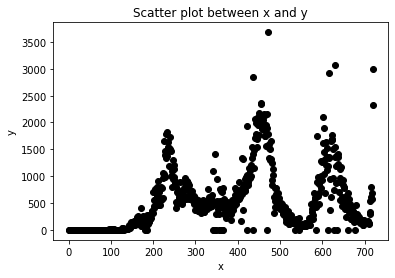

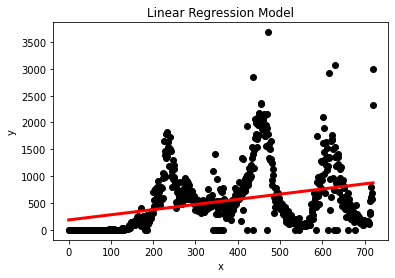

w = [ 0.00000000e+00 -5.21537940e-01  2.44330374e-02 -5.90716022e-05
  3.83511283e-08], b = -52.708293906357994


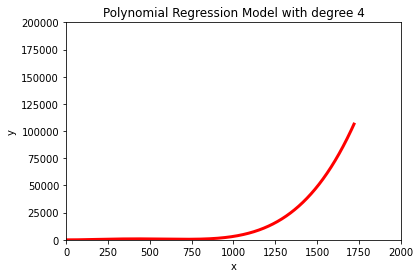

    degree        RMSE
0        0  579.514166
1        1  543.936159
2        2  504.148066
3        3  503.411546
4        4  500.986786
5        5  499.469575
6        6  500.302268
7        7  500.269743
8        8  502.251807
9        9  504.551611
10      10  503.173336
11      11  495.253371
12      12  481.810420
13      13  468.283811
14      14  461.389463
15      15  465.106854
16      16  561.487081
17      17  558.509226
18      18  555.340561
19      19  552.650879
20      20  550.746094
21      21  549.644155
22      22  549.188722
23      23  549.155219
24      24  549.326659
25      25  549.535275


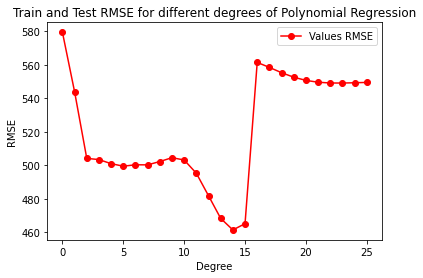

y = 229.51739998282892 +(-4.159418337701368e-24)x1 +(-1.4051503201884844e-27)x2 +(6.500548666747098e-32)x3 +(-5.918370692325381e-35)x4 +(1.1113599295493391e-33)x5 +(3.48604649527814e-31)x6 +(9.905601695265452e-29)x7 +(2.431591282521909e-26)x8 +(4.680712888760537e-24)x9 +(5.450030079014942e-22)x10 +(-3.531066086224866e-24)x11 +(8.547549547555495e-27)x12 +(-9.160391141284914e-30)x13 +(3.6669590354939415e-33)x14


In [27]:

from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pos1 = 0
pos2 = 0
col_list = ['Date_reported', 'Country', 'New_cases'] # String 
dataset = pd.read_csv('WHO-COVID-19-global-data.csv', usecols=col_list)

xx = dataset.loc[dataset['Country'] == 'Ethiopia']
xx['Date_reported'] = xx['Date_reported'].astype('category').cat.codes

pos1 = dataset.columns.get_loc('Date_reported')
pos11 = pos1-1
pos2 = dataset.columns.get_loc('New_cases')

X = xx.iloc[:, pos1].values
X = X.reshape(-1, 1)

yy = dataset.loc[dataset['Country'] == 'Ethiopia']
y = yy.iloc[:, pos2].values


plt.plot(X, y, 'ko')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot between x and y')
plt.show()
#-----------------------------------------------------------------
model = LinearRegression()
model.fit(X, y)

model_curve = model.predict(X)
plt.plot(X[:, 0], y, 'ko')
plt.plot(X[:, 0], model_curve, 'r-', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.show()
#------------------------------------------------------------------
features = PolynomialFeatures(degree=4)
x_train_transformed = features.fit_transform(X)


model = LinearRegression()
model.fit(x_train_transformed, y)

x_pred = np.arange(0,len(y)+1000)
x_pred = x_pred[:, np.newaxis]

x_true_transformed = features.fit_transform(x_pred)
model_curve = model.predict(x_true_transformed)

print('w = ' + str(model.coef_) +
      ', b = ' + str(model.intercept_))



plt.plot(x_pred[:, 0], model_curve, 'r-', linewidth=3)
plt.xlim(0,2000)
plt.ylim(0,200000)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Model with degree 4')
plt.show()
#----------------------------------------------------------------


def poly_reg(degrees, x_train, y_train, plot=False):
    features = PolynomialFeatures(degree=degrees)
    x_train_transformed = features.fit_transform(x_train)
    model = LinearRegression()
    model.fit(x_train_transformed, y_train)

    train_pred = model.predict(x_train_transformed)
    rmse_poly_train = mean_squared_error(y_train, train_pred, squared=False)


    if plot == True:
        plt.plot(x_train[:, 0], y_train, 'ko')
        plt.plot(X[:, 0], model_curve, 'r-', linewidth=3)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Linear Regression Model')
        plt.show()

    return [rmse_poly_train]


errors = []

for i in range(26):
    errors.append([i] + poly_reg(i, X, y))

bestdegree = np.argmin(errors, axis=0)[1]

df = pd.DataFrame(errors, columns=['degree', 'RMSE'])

print(df)

plt.plot(df['degree'], df['RMSE'], 'o-r', label='Values RMSE')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()
plt.title('Train and Test RMSE for different degrees of Polynomial Regression')
plt.show()

bestdegree = np.argmin(errors, axis=0)[1]
features2 = PolynomialFeatures(degree=bestdegree)

x_train_transformed2 = features2.fit_transform(X)

model3 = LinearRegression()
model3.fit(x_train_transformed2, y)

x_true_transformed2 = features2.fit_transform(X)
model_curve3 = model3.predict(x_true_transformed2)
mse = mean_squared_error(y_true=y, y_pred=model_curve3)
rmse = np.sqrt(mse)
r2 = r2_score(y_true=y, y_pred=model_curve3)
coefs = model3.coef_
eq = "y = "+ str(model3.intercept_)
for i in range(len(coefs)):
    if i != 0:
        eq += " +(" + str(coefs[i])+")x"+str(i)
    
print(eq)
